### 웹툰 이미지를 다운로드하여 로컬에 저장하기

In [6]:
import requests
import os

# 이미지를 받아오기 위한 url 참조자
req_header_dict = {
    'referer': 'https://comic.naver.com/webtoon/detail?titleId=570503&no=391&weekday=thu'
}

img_url_list = {
    'https://image-comic.pstatic.net/webtoon/570503/391/20220112175827_ad4261ccdd0a73222d08e6de212e6947_IMAG01_1.jpg',
    'https://image-comic.pstatic.net/webtoon/570503/391/20220112175827_ad4261ccdd0a73222d08e6de212e6947_IMAG01_2.jpg',
    'https://image-comic.pstatic.net/webtoon/570503/391/20220112175827_ad4261ccdd0a73222d08e6de212e6947_IMAG01_3.jpg'
}

for img_url in img_url_list:
    res = requests.get(img_url, headers=req_header_dict)
    print(res.status_code)
    if res.ok:
        # binary data 가져올 때, .content 속성 사용
        img_data = res.content
        #print(len(img_data))
        # url에서 파일명만 추출하기
        file_name = os.path.basename(img_url)
        #print(file_name)
        
        # 서버에서 가져온 binary data를 file로 저장하기
        file_name1 = 'data/'+ file_name
        with open(file_name1, 'wb') as file:
            print(f'Write to file {file_name} (({len(img_data)}) bytes')
            file.write(img_data)

200
Write to file 20220112175827_ad4261ccdd0a73222d08e6de212e6947_IMAG01_2.jpg ((106245) bytes
200
Write to file 20220112175827_ad4261ccdd0a73222d08e6de212e6947_IMAG01_1.jpg ((132872) bytes
200
Write to file 20220112175827_ad4261ccdd0a73222d08e6de212e6947_IMAG01_3.jpg ((305991) bytes


### 웹툰의 특정 회차의 모든 image 다운로드
- Attribute Selector를 사용하여 jpg파일명들을 모두 추출하여 리스트에 저장하기
- 리스트를 순회하면서 image 다운로드하기

In [19]:
import requests
from bs4 import BeautifulSoup

main_url = 'https://comic.naver.com/webtoon/detail?titleId=570503&no=391&weekday=thu'
res = requests.get(main_url)

if res.ok:
    soup = BeautifulSoup(res.text, 'html.parser') # res.text -> html 코드
    img_tags = soup.select("img[src$='.jpg']") # img태그 안에 src속성이 .jpg로 끝나는 것만 선택
    #print(len(img_tags), type(img_tags)
    
    img_url_list=[]
    for img_tag in img_tags:
        #print(type(img_tag), img_tag)
        # img 태그의 src 속성의 값 추출
        img_url = img_tag["src"]
        img_url_list.append(img_url)
print(len(img_url_list))
print(img_url_list[:4])

69
['https://shared-comic.pstatic.net/thumb/webtoon/570503/thumbnail/thumbnail_IMAG04_a6dfb97e-a475-4272-8794-b046df0b6c60.jpg', 'https://image-comic.pstatic.net/webtoon/570503/391/20220112175827_ad4261ccdd0a73222d08e6de212e6947_IMAG01_1.jpg', 'https://image-comic.pstatic.net/webtoon/570503/391/20220112175827_ad4261ccdd0a73222d08e6de212e6947_IMAG01_2.jpg', 'https://image-comic.pstatic.net/webtoon/570503/391/20220112175827_ad4261ccdd0a73222d08e6de212e6947_IMAG01_3.jpg']


### img 디렉토리 생성하기
- 디렉토리 생성하는 2가지 함수 : os.mkdir() / osk.makedirs()
    - os.mkdir()은 한 개의 폴더만 생성
    - os.makedirs()은 하위 폴더를 생성

In [20]:
import os

dir_path = 'img'

# img 디렉토리가 없으면
if not os.path.isdir(dir_path): # !os.path.isdir('img')
    os.mkdir(dir_path)

- 리스트 순회하면서 image 다운로드 하기

In [21]:
for idx, img_url in enumerate(img_url_list, 1):
    # print(f'다운로드 번호 {idx}, URL = {img_url}')
    req_header1 ={'referer': main_url}
    res = requests.get(img_url, headers=req_header1)
    if res.ok:
        img_data = res.content
        file_name2 = os.path.basename(img_url)
        file_name2 = 'img/' + file_name2
        with open(file_name2,'wb') as file1:
            file1.write(img_data)

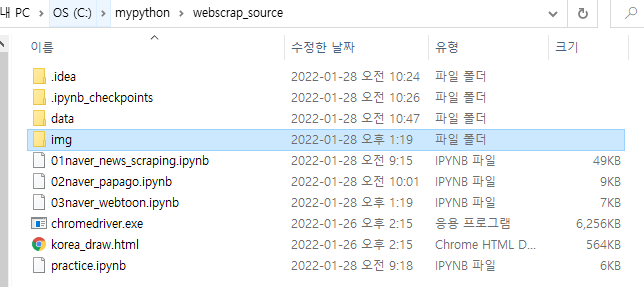
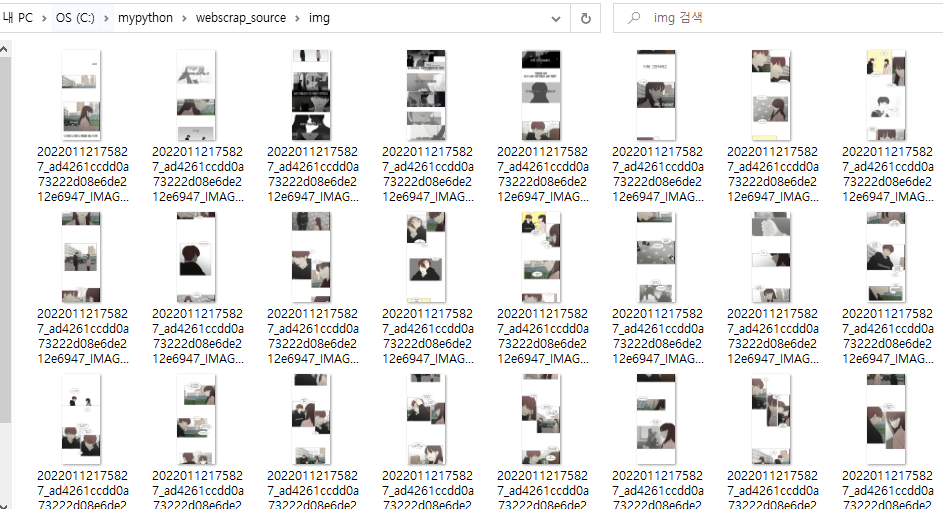

### 파일이 있는 디렉토리 삭제

In [22]:
import shutil
import os

dir_path = 'img'

# img 디렉토리가 있다면
if os.path.exists(dir_path):
    shutil.rmtree(dir_path)

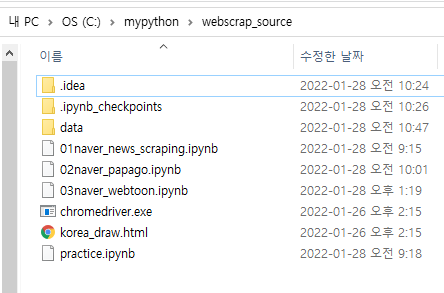

### 웹툰 제목과 특정 회차의 url을 argument로 받아서 다운로드

In [98]:
def download_image(title, episode_url):
    import requests
    from bs4 import BeautifulSoup
    import os
    import shutil
    
    # img 폴더가 있으면 삭제하기
    dir_path = 'img'
    if os.path.exists(dir_path):
        shutil.rmtree(dir_path)
        
    # img 폴더가 없으면 생성하기    
    if not os.path.isdir(dir_path):
        title_path = os.path.join(dir_path, title) # img\독립일기
        print(title_path)
        os.makedirs(title_path)
        
    # img url 목록을 알아내기 위한 요청 보내기    
    res = requests.get(episode_url)
    
    if res.ok:
        soup = BeautifulSoup(res.text,'html.parser')
        img_tags = soup.select("img[src$='.jpg']")
        #print(len(img_tags), type(img_tags))
    
    # argument로 받은 특정 회차의 url을 referer 헤더로 설정하기
    req_header = {'referer': episode_url}
    
    for idx, img_tag in enumerate(img_tags,1):
        #print(f'다운로드 번호 {idx}')
        img_url = img_tag['src']
        
        # jpg의 image 데이터 요청하기
        res_img = requests.get(img_url, headers=req_header)
        if res_img.ok: 
            # image binary 데이터 가져오기
            img_data = res_img.content   
            
            file_name = title_path + '\\' + os.path.basename(img_url)
            with open(file_name, 'wb') as file:
                #print(f'{file_name} ({len(img_data)}) bytes')
                file.write(img_data)

In [99]:
download_image('독립일기', 'https://comic.naver.com/webtoon/detail?titleId=748105&no=136&weekday=thu')

img\독립일기


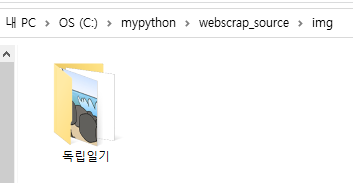
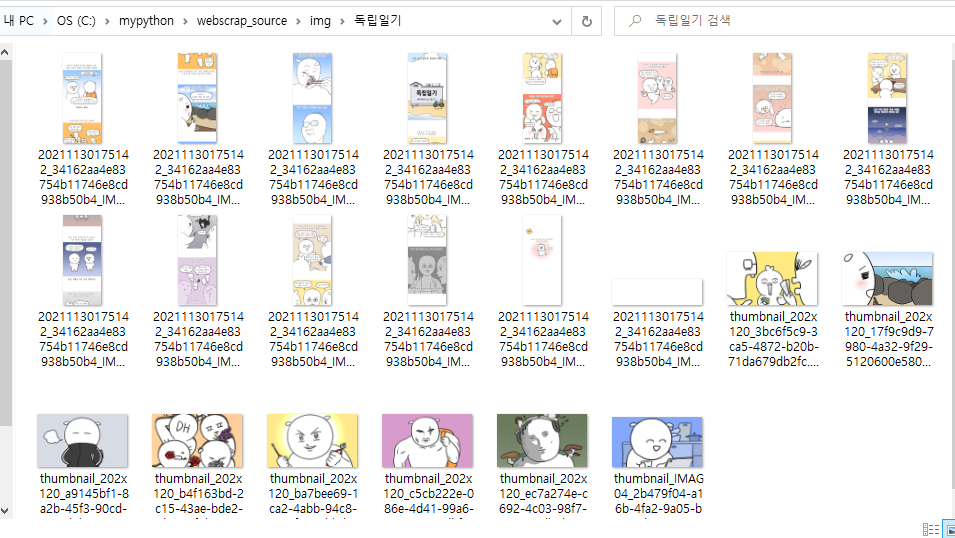

### Image file Upload
- https://httpbin.org/ URL로 요텅을 보내서 다운로드 받은 image 파일을 업로드하기
- requests.post() 함수를 사용하고, file속성에 image data를 지정한다.
- files - (optional) Dictionary of 'filename': file-like-objects for multipart encoding upload
https://docs.python-requests.org/en/v0.4.1/api/

In [1]:
import requests

upload_files_dict = {
    'img1': open('data\\f1.jpg','rb'),
    'img2': open('data\\f2.jpg','rb'),
    'img3': open('data\\f3.jpg','rb')
}

url = 'https://httpbin.org/post'
res = requests.post(url, files=upload_files_dict)
print(res.status_code)
res_data = res.json()
img1_data = res_data['files']['img1']
print(img1_data)

200
data:application/octet-stream;base64,/9j/4AAQSkZJRgABAgAAAQABAAD/2wBDAAMCAgMCAgMDAwMEAwMEBQgFBQQEBQoHBwYIDAoMDAsKCwsNDhIQDQ4RDgsLEBYQERMUFRUVDA8XGBYUGBIUFRT/2wBDAQMEBAUEBQkFBQkUDQsNFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBT/wAARCAZAArIDASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwD9U6KKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooo